In [5]:
import gin
from keychest.keychestenv import KeyChestEnvironmentRandom, KeyChestGymEnv, KeyChestEnvironment
from keychest.keychestenv_gui import jupyter_gui
from keychest.keychestenv_gofa import features_for_obs, max_reward, hardcoded_policy_step
from matplotlib import pyplot as plt
from helpers import get_env_performance
import numpy as np
from tqdm import tqdm
from time import time

In [6]:
gin.enter_interactive_mode()
#gin.parse_config_file('./keychest/config/5x5.gin')
gin.parse_config_file('./keychest/config/10x10.gin')
#gin.bind_parameter('KeyChestEnvironment.flatten_observation', False)

In [7]:
env = KeyChestGymEnv()

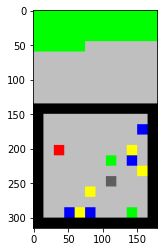

down (1, 0) 0 0.49 False {'action': 2, 'event': 'chest_opened', 'moves': 18} 0.9099999999999999


 x


In [8]:
jupyter_gui(env)

In [9]:
#print("Steps per second:", get_env_performance(env, 3))

In [10]:
env.observation_space.shape, env.action_space.shape, env.reset().shape

((21, 12, 10), (), (21, 12, 10))

In [11]:
#import gym
#env1 = gym.make('CartPole-v0')
#get_env_performance(env1, 3)

In [12]:
features_for_obs(env.reset())

{'player_position_x': 16,
 'player_position_y': 6,
 'lamp_state': 0,
 'at_food': False,
 'at_key': False,
 'at_chest': False,
 'at_button': False,
 'health': 15.0,
 'keys_collected': 0.0}

In [16]:
def get_policy_stats(env, policy, title="Reward stats"):
    """Show reward distribution for a policy."""
    mr = max_reward(env)
    
    def reward_on_policy(env, policy):
        done = False
        Rmax = max_reward(env)
        obs = env.reset()
        R = 0
        while not done:
            act = policy(env)
            obs, rew, done, info = env.step(act)
            #plt.imshow(env.render(mode='rgb_array'))
            #plt.show()
            R += rew
        #print(f"Reward {R} out of {Rmax}")
        return R

    rews = [reward_on_policy(env, policy) for _ in tqdm(range(500))]

    print(title)
    print('min/max/mean/std/median', np.min(rews), np.max(rews), np.mean(rews), np.std(rews), np.median(rews))
    print("Reward upper bound", mr)

    plt.title(title)
    plt.hist(rews, alpha=0.5, label='Reward')
    plt.axvline(mr, color='red', label='Maximal reward')
    plt.legend()
    plt.show()

100%|██████████| 500/500 [00:16<00:00, 30.00it/s]


Rewards by hardcoded policy
min/max/mean/std/median 0.6399999999999999 3.7400000000000038 2.6290000000000044 1.0992629348795533 3.1400000000000072
Reward upper bound 3.6


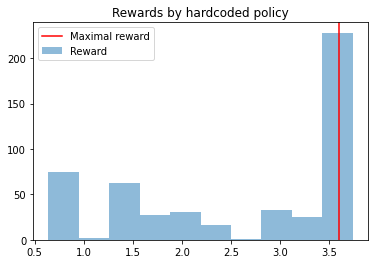

In [17]:
get_policy_stats(env, hardcoded_policy_step, title="Rewards by hardcoded policy")

100%|██████████| 500/500 [00:02<00:00, 188.51it/s]


Rewards on a random policy
min/max/mean/std/median -0.3100000000000002 1.6899999999999997 0.050499999999999934 0.33323377679941146 -0.16
Reward upper bound 3.6


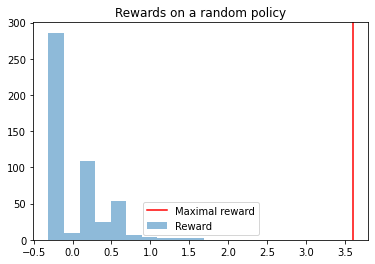

In [18]:
get_policy_stats(env, lambda x: env.action_space.sample(), "Rewards on a random policy")